Afficher des cartes de manière géométrique
====

L'objectif de ce TD est d'essayer de donner une intuition de la manière dont on pourrait afficher des données associées à une carte. Pour cela, nous allons nous donner une liste de coordonnées. Nous considèrerons que ces coordonnées représentent des villes, et que toutes les villes sont reliées entre elles par des routes. Pour éviter que l'exercice soit trop compliqué, nous considèrerons que toutes les routes sont droites.

Partie 1
-----
Dans un premier temps, nous allons essayer d'afficher toutes les routes entre les différentes villes. Mathématiquement, cela revient à tracer toutes les diagonales du polygone que constitue l'ensemble des villes.

Commençons par comprendre comment fonctionne ce *notebook* Jupyter. Il propose deux types de cellules. La cellules dans laquelle j'écris actuellement utilise du *markdown*, une manière simplifiée de mettre en forme un texte. D'autres cases sont fait pour recevoir du code. Pour que le code prenne effet, ces cases doivent être exécutées.  Par exemple, dans la case suivante, j'importe une partie de la bibliothèque *matplotlib* qui va nous permettre de tracer les routes entre les villes de manière graphique. Allez donc sur cette case et cliquez sur le bouton ``Exécuter`` ou bien utilisez le raccourci clavier ``Shift + Entrée``. 

In [4]:
import matplotlib.pyplot as plt 

import random
import math

Nous allons maintenant voir comment stocker des coordonnées en Python. En Python, les tableaux que nous avons vu en cours n'existent pas. Ils sont remplacés par des listes, qui sont beaucoup plus flexibles et puissantes que des tableaux. Les listes sont représentées de la manière suivante : 
``[e0,e1,e2,....,en]``
où ``e*`` sont les différents éléments de la liste. 

Pour obtenir le k-ième élément de la list ``l`` (attention, on compte à partir de 0 ! ), on écrit ``l[k]``. 

Le code qui suit montre comment créer deux positions. Nous décidons que la première coordonnée correspond à l'axe "x" et la seconde à l'axe "y" d'un repère orthonormé. De manière générale, si l'on avait des coordonnées angulaires (lattitude, longitude), on les convertirait dans tous les cas vers un repère orthonormé standard.

**Question 1**
Quel est le type d'une position ? Pour répondre aux question demandant du texte, utilisez le menu ``Insert`` pour ajouter une cellule, et sélectionnez le type ``Markdown`` dans le menu déroulant et appuyez sur ``M``.

Une position est une liste de float. On pourrait par exemple écrire son type de manière informelle (et non liée à Python) ``List[Float]``.

**Question 2** 
Exécutez la cellule de code juste après celle qui déclare ``ville1`` et ``ville2``. Que se passe-t-il ?

La phrase "L'ordonnée de la ville 2 est de 0.5 ." s'affiche.

**Question 3**
Ajoutez à l'aide du menu ``Insert``une cellule, mais cette fois de code et déclarez une troisième ville, nommée ``ville3``. Affichez l'abscisse de cette ville.

In [5]:
ville1 = [0,1.5]
ville2 = [2,0.5]
print("L'ordonnée de la ville 2 est de",ville2[1],".")

L'ordonnée de la ville 2 est de 0.5 .


In [6]:
ville3 = [2,2.5]
print(ville3[0])

2


Nous allons maintenant afficher les trois routes qui relient les trois villes, autrement dit un triangle. Pour cela, nous allons utiliser la bibliothèque graphique *matplotlib*. Pour afficher un seqment entre deux points de coordonnées ``(x1,y1)`` et ``(x2,y2)``, on utilise la fonction ``plot``, qui prend en paramètre d'abord les abscisses, puis les ordonnées : ``plot([x1,x2],[y1,y2])``. Attentionb, ``plot`` appartient à la bibliothèque``matplotlib.pyplot`` que j'ai abrégé au début du fichier en ``plt``. On doit donc écrire ``matplotlib.pyplot.plot`` ou, grâce à l'abréviation, ``plt.plot``.

**Question 4**
Commencez par exécuter le code suivant, puis complétez le de telle sorte que ``ville1``, ``ville2`` et ``ville3`` forment un triangle.

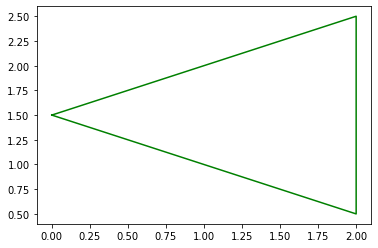

In [10]:
plt.plot([ville1[0], ville2[0], ville3[0],ville1[0]], [ville1[1], ville2[1], ville3[1],ville1[1]],color="green")

**Question 5**
Si l'on souhaite ajouter une quatrième ville, combien de segment devra-t-on rajouter pour qu'il y ait une route entre chaque couple de ville ? 



On devra ajouter 3 segments. De manière générale, si on a déjà ``n`` villes, il faudra ajouter n segments supplémentaires pour ajouter la ``n+1``ème ville.

Ajouter chaque ligne via la commande ``plot`` va rapidement devenir fastidieux, et de même pour l'ajout de chaque ville. Pour mieux ranger nos villes, nous allons les stocker dans une liste.

**Question 6** 
Ajoutez une cellule de code et créez la liste des villes 1,2 et 3 et affichez l'ordonnée de la ville 2  au sein de cette liste. Notre numérotation des villes était elle vraiment judicieuse ?

In [11]:
mes_villes = [ville1, ville2, ville3]

Non, ce choix de numérotation n'est pas judicieux car il crée une confusion avec python qui compte à partir de 0.

Partie 2
---------------------

Pour nous confronter à de plus grande quantité de données, je vais générer aléatoirement ``n`` positions de villes et afficher les routes qui les relient.

**Question 7**
Essayez plusieurs valeurs de ``n`` (attention, des valeurs dépassant 100 feront planter python, vous pouvez essayer mais ça pourrait vous faire perdre du temps). A partir de ``n > 15``, qu'observe-t-on ? 

On observe que la "carte" est de moins en moins lisible. Certaines villes disparaissent sous les trop nombreuses "routes".

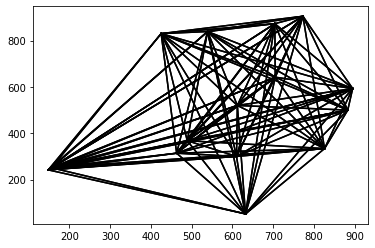

In [6]:
n = 15
villes = [[random.randint(0,1000),random.randint(0,1000)] for i in range(n)]

for ville1 in villes :
    for ville2 in villes : 
        plt.plot([ville1[0], ville2[0]], [ville1[1], ville2[1]],color="black")

Une première approche pour rendre notre "carte" plus lisible serait d'enlever les routes qui sont trop longues. En effet, celles-ci cachent souvent des villes sous-elles et empêchent la lisibilité. Pour cela, nous devons calculer la distance entre deux points. Nous aurons besoin pour cela d'utiliser une racine carrée, dont la fonction ``sqrt`` est fournie par la bibliothèque *math*. 

**Question 8**
Complétez le code ci-dessous pour que, au lieu de renvoyer 0, la fonction ``distance`` renvoie la distance entre ``ville1`` et ``ville2`` au lieu de renvoyer l'abscisse de ``ville1`` comme c'est le cas pour l'instant. Indice : si on veut obtenir le carré d'une variable ``x`` en python, on peut écrire ``x*x`` (x multiplié par lui même), ou bien ``x**2``. La racine carrée d'un nombre ``z`` s'écrit ``math.sqrt(z)``.

In [14]:
def distance(ville1,ville2) : 
    return math.sqrt((ville1[0] - ville2[0])**2 + (ville1[1] - ville2[1])**2)


On en déduit alors le code suivant, qui utilise l'instruction ``if``. Cette instruction impose une condition à l'exécution du code qui la suit. ``if`` signifie "si" en anglais. Ici, on affiche la route si sa longueur est inférieure à la variable ``longueur_min`` déclarée précédemment.

**Question 9** 
Essayez différentes longueurs pour ``longueur_min``.

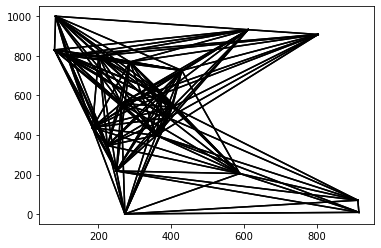

In [17]:
n = 20
villes = [[random.randint(0,1000),random.randint(0,1000)] for i in range(n)]
longueur_min = 700

for ville1 in villes :
    for ville2 in villes : 
        if(distance(ville1,ville2) <= longueur_min) :
            plt.plot([ville1[0], ville2[0]], [ville1[1], ville2[1]],color="black") 

**Question 10**
Changez la condition pour faire en sorte que seules les longueurs les plus grandes apparaissent.

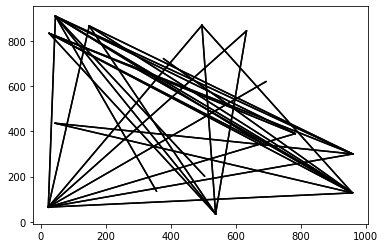

In [20]:
n = 20
villes = [[random.randint(0,1000),random.randint(0,1000)] for i in range(n)]
longueur_min = 800

for ville1 in villes :
    for ville2 in villes : 
        if(distance(ville1,ville2) > longueur_min) :
            plt.plot([ville1[0], ville2[0]], [ville1[1], ville2[1]],color="black") 

Lorsqu'une condition n'est pas satisfaite, il est fréquent que l'on souhaite proposer une alternative. Dans ce cas , on écrit ``else : `` (ce qui signifie "sinon") suivi de l'instruction que l'on veut exécuter.

**Question 11**
Afficher les route plus grandes que 500 en rouge celles plus petites en noir.



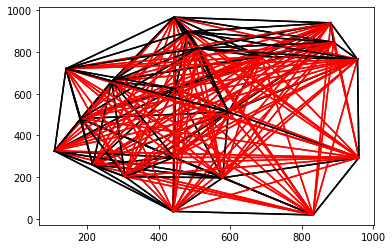

In [21]:
n = 20
villes = [[random.randint(0,1000),random.randint(0,1000)] for i in range(n)]
longueur_min = 500

for ville1 in villes :
    for ville2 in villes : 
        if(distance(ville1,ville2) <= longueur_min) :
            plt.plot([ville1[0], ville2[0]], [ville1[1], ville2[1]],color="black") 
        else : 
            plt.plot([ville1[0], ville2[0]], [ville1[1], ville2[1]],color="red") 

**Question 12**
Affichez uniquement les routes dont la longueur se situe entre 100 et 500.



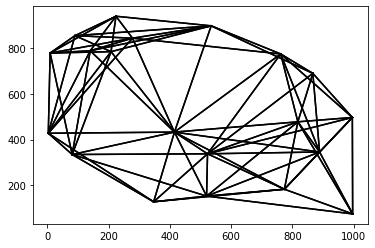

In [23]:
n = 20
villes = [[random.randint(0,1000),random.randint(0,1000)] for i in range(n)]

for ville1 in villes :
    for ville2 in villes : 
        if(distance(ville1,ville2) <= 500 and distance(ville1,ville2) >= 100) :
            plt.plot([ville1[0], ville2[0]], [ville1[1], ville2[1]],color="black") 

**Question 13**
Ajoutez des couleurs pour les différentes longueurs.

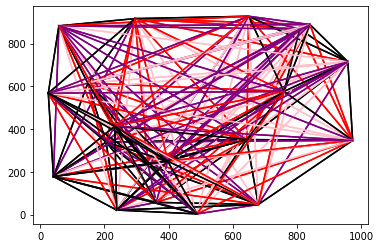

In [27]:
n = 20
villes = [[random.randint(0,1000),random.randint(0,1000)] for i in range(n)]

for ville1 in villes :
    for ville2 in villes : 
        if(distance(ville1,ville2) <= 500 and distance(ville1,ville2) >= 200) :
            plt.plot([ville1[0], ville2[0]], [ville1[1], ville2[1]],color="black") 
        elif(distance(ville1,ville2) <= 700 and distance(ville1,ville2) >= 500) :
            plt.plot([ville1[0], ville2[0]], [ville1[1], ville2[1]],color="red")
        elif(distance(ville1,ville2) <= 1000 and distance(ville1,ville2) >= 800) :
            plt.plot([ville1[0], ville2[0]], [ville1[1], ville2[1]],color="pink") 
        else :
            plt.plot([ville1[0], ville2[0]], [ville1[1], ville2[1]],color="purple") 

Dans l'exemple suivant, on place les villes sur un cercle pour obtenir une figure géométrique.

**Question 14** 
Proposez un code pour faire en sorte qu'une moitié des villes soit alignée de manière horizontale et l'autre de manière horizontale.

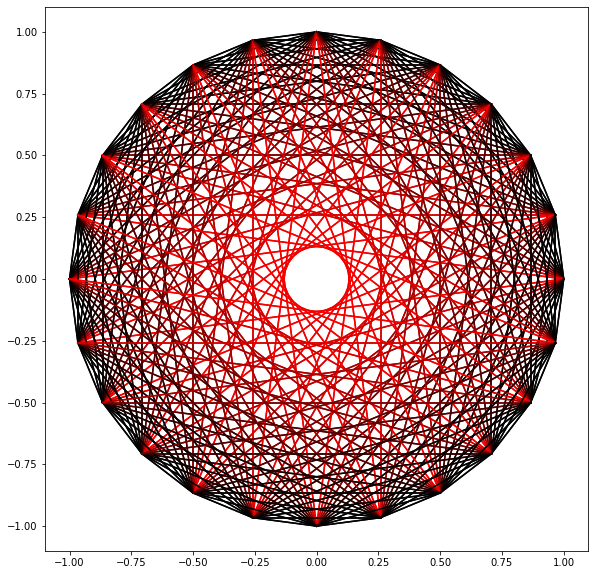

In [30]:
n = 24
villes = [[math.cos(2*i*math.pi / n),math.sin(2*i * math.pi / n)] for i in range(n)]
longueur_min = 1.7

fig, ax = plt.subplots()

ax.set_aspect(1)

plt.rcParams["figure.figsize"] = (10,10)
    
for ville1 in villes :
    for ville2 in villes : 
        if(distance(ville1,ville2) <= 1.99) :
            plt.plot([ville1[0], ville2[0]], [ville1[1], ville2[1]],color=((distance(ville1,ville2)/2)**5,0.,0.))

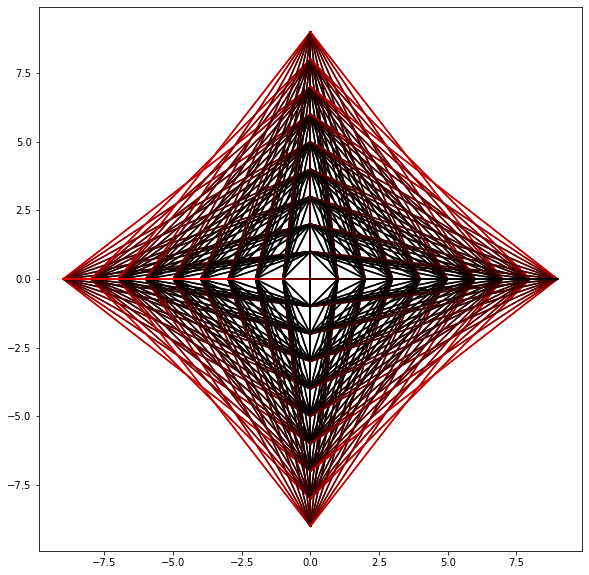

In [35]:
n = 10
villes = [[0, i] for i in range(-n + 1,n)] + [[i,0] for i in range(-n + 1,n)]
longueur_min = 1.7

fig, ax = plt.subplots()

ax.set_aspect(1)

plt.rcParams["figure.figsize"] = (10,10)
    
for ville1 in villes :
    for ville2 in villes : 
        if(distance(ville1,ville2) <= 12) :
            plt.plot([ville1[0], ville2[0]], [ville1[1], ville2[1]],color=((distance(ville1,ville2)/12)**5,0.,0.))

**Question ouverte**
Laissez parler votre créativité et faites apparaître de beaux motifs géométriques.

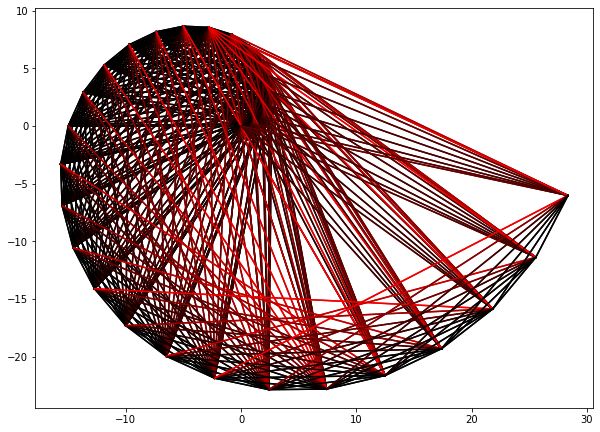

In [37]:
n = 30
villes = [[i*math.cos(2*i*math.pi / n),i*math.sin(2*i * math.pi / n)] for i in range(n)]
longueur_min = 1.7

fig, ax = plt.subplots()

ax.set_aspect(1)

plt.rcParams["figure.figsize"] = (10,10)
    
for ville1 in villes :
    for ville2 in villes : 
        if(distance(ville1,ville2) <= 35 ) :
            plt.plot([ville1[0], ville2[0]], [ville1[1], ville2[1]],color=((distance(ville1,ville2)/35)**5,0.,0.))
            
